In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0,1, (num_examples, len(w)))
    y= torch.matmul(X, w) + b
    print(X.shape, y.shape)
    y+= torch.normal(0,0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
print(true_w)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape, labels.shape)



tensor([ 2.0000, -3.4000])
torch.Size([1000, 2]) torch.Size([1000])
torch.Size([1000, 2]) torch.Size([1000, 1])


In [8]:
print(features[0], labels[0])

tensor([1.8094, 1.9977]) tensor([1.0143])


[ 1.80938351e+00 -3.28014702e-01 -4.93398815e-01 -5.58382094e-01
 -7.99189925e-01 -1.41204312e-01  8.59638870e-01 -1.34052575e+00
 -1.93436623e+00 -1.37984455e+00 -5.47725499e-01 -1.25314355e+00
  3.74793887e-01 -7.60020018e-01 -1.01678884e+00 -2.42479652e-01
  6.39719188e-01  1.74732268e+00  4.93311048e-01  4.57757488e-02
 -9.42732319e-02  2.36460543e+00  2.07106853e+00 -7.33297706e-01
 -1.61642289e+00 -3.16174120e-01  2.79875517e-01 -8.90799522e-01
  1.05175614e+00  3.43414754e-01  1.39511216e+00  8.89302194e-01
  5.98442852e-01 -7.52881348e-01 -8.72744501e-01 -1.07846427e+00
 -2.59462446e-01 -3.95699382e-01  2.48899490e-01  1.17736590e+00
 -6.57481313e-01  1.93256271e+00 -7.15976775e-01  4.72309351e-01
  1.71674907e+00  8.30168724e-02 -1.20503783e-01 -3.15789074e-01
  3.56754780e-01  3.58447075e-01  9.41484690e-01 -8.44992220e-01
  4.35949028e-01 -4.38642472e-01 -6.01539075e-01  2.19954938e-01
  2.77485800e+00 -8.24074566e-01 -4.01140332e-01 -9.33348179e-01
 -7.03832924e-01  2.65200

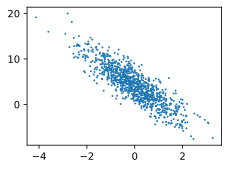

In [17]:
# print(features[:,1].detach().numpy())
print(features[:,0].detach().numpy())
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)

In [23]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    # print(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        # print(batch_indices)
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.4051, -0.0392],
        [-2.7862, -1.3001],
        [ 0.3210,  0.5436],
        [ 0.4963, -0.1929],
        [-0.0902,  0.8853],
        [-0.7416, -1.1055],
        [-0.0678, -0.0328],
        [ 1.2590,  0.1467],
        [ 1.0224, -0.2915],
        [ 1.0922,  0.3525]]) tensor([[5.1402],
        [3.0330],
        [3.0049],
        [5.8435],
        [1.0204],
        [6.4602],
        [4.1671],
        [6.2086],
        [7.2207],
        [5.2036]])


In [24]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

w,b

(tensor([[ 0.0130],
         [-0.0034]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [25]:
def linear_regression(X,w, b):
    return torch.matmul(X, w) + b


In [26]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2